

# <font face="arial" color="blue" size=12pt>Applications with Neural Networks - Part I</font>

## Neural Networks Review from DATA 201

### Intro to the Multilayer Perceptron
Before proceeding with these examples, watch the below videos.  The first 2 are required. The last 2 are optional but highly recommended, even if you have not had any calculus or linear algebra!

1. [But what is a Neural Network?](https://www.youtube.com/watch?v=aircAruvnKk)
2. [Gradient descent, how neural networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w)
3. [What is backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
4. [Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8)


### Test Your Understanding:

1. What is a multilayer perceptron?
2. What is a hidden layer?
3. The network in the video was on the small-ish side, having only 2 hidden layers with 16 neurons each.  How many total parameters (i.e. weights and biases) have to be determined during the training process for this network?
4. Without reference to the calculus involved, do you understand the concept of gradient descent?

### Classifying digits with an MLP

Good read about optimization algorithms used in neural networks:

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

<font color="red" size=5pt> You can skip to the Keras/Tensorflow section

In [ ]:


ccdb = pd.read_csv("drive/MyDrive/Data Sets/UCI_Credit_Card.csv")
#ccdb.transpose()

# here to avoid errors, make sure x and y are just numpy arrays (extract the values from the data frames)
x = ccdb.loc[:,'LIMIT_BAL':'PAY_AMT6'].values
y = ccdb["default.payment.next.month"].values

In [ ]:
ccdb

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
# do we really need this? What is the message?
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3,shuffle=True,random_state=123)
# in reality we rather prefer complete K-Fold cross-validations

In [ ]:
scale = StandardScaler()
# message via dendrites artificial neurons perform dot products with different features and, therefore, we want the different feature values to be on the same metric.
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest)

### We are now building an artificial brain!

In [ ]:
# we need some imports
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc, classification_report as CR

In [ ]:
# this is where we build the AI
brain1  = MLPClassifier(hidden_layer_sizes=(100,100),solver='adam',activation='logistic',max_iter=2000)

In [ ]:
brain1.fit(xtrain_scaled,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=2000)

In [ ]:
brain1.score(xtest_scaled,ytest)# the overall accuracy on the test set

0.8205555555555556

In [ ]:
cm = confusion_matrix(ytest,brain1.predict(xtest_scaled))

In [ ]:
pd.DataFrame(data=cm,index=['No Default','Default'],columns=['No Default','Default'])

,No Default,Default
No Default,6662,390
Default,1225,723


In [ ]:
print(CR(ytest,brain1.predict(xtest_scaled)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [ ]:
# this is where we build a different "brain"
# but do we start??
# we typically start in a very conservative way
brain  = MLPClassifier(hidden_layer_sizes=(4,4),solver='adam',activation='relu',max_iter=10000)

In [ ]:
brain.fit(xtrain_scaled,ytrain)

MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=10000)

In [ ]:
pd.DataFrame(data=confusion_matrix(ytest,brain.predict(Xtest_scaled)),index=['No Default','Default'],columns=['No Default','Default'])

,No Default,Default
No Default,6616,436
Default,1195,753


<font color='red' size=6 >We want a complete Stratified K-Fold cross-validation</font>

We typically want a "stratified cross-validation" for classification problems! (especially those with class-imbalance)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report as CR

In [ ]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=123)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(6,6),solver='adam',activation='relu',max_iter=2000)

In [ ]:
# it's a good idea to collect the recalls of '0' and '1'
recall0 = []
recall1 = []
for idxtrain, idxtest in skf.split(x,y):
  xtrain = scale.fit_transform(x[idxtrain])
  xtest = scale.transform(x[idxtest])
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  model.fit(xtrain,ytrain)
  recall0.append(CR(ytest,model.predict(xtest), output_dict=True)['0']['recall'])
  recall1.append(CR(ytest,model.predict(xtest), output_dict=True)['1']['recall'])


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
def validation(model,x,y,nfolds,rs):
  skf = StratifiedKFold(n_splits=nfolds,shuffle=True,random_state=rs)
  recall0 = []
  recall1 = []
  for idxtrain, idxtest in skf.split(x,y):
    xtrain = scale.fit_transform(x[idxtrain])
    xtest = scale.transform(x[idxtest])
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    model.fit(xtrain,ytrain)
    recall0.append(CR(ytest,model.predict(xtest), output_dict=True)['0']['recall'])
    recall1.append(CR(ytest,model.predict(xtest), output_dict=True)['1']['recall'])
  print('Avg. recall of 0 : '+str(np.mean(recall0)),' Avg. recall of 1:'+str(np.mean(recall1)))

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(12,12),solver='adam',activation='relu',max_iter=2000)

In [ ]:
validation(model,x,y,10,123)

Avg. recall of 0 : 0.9457279522101276  Avg. recall of 1:0.36753598102818513


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


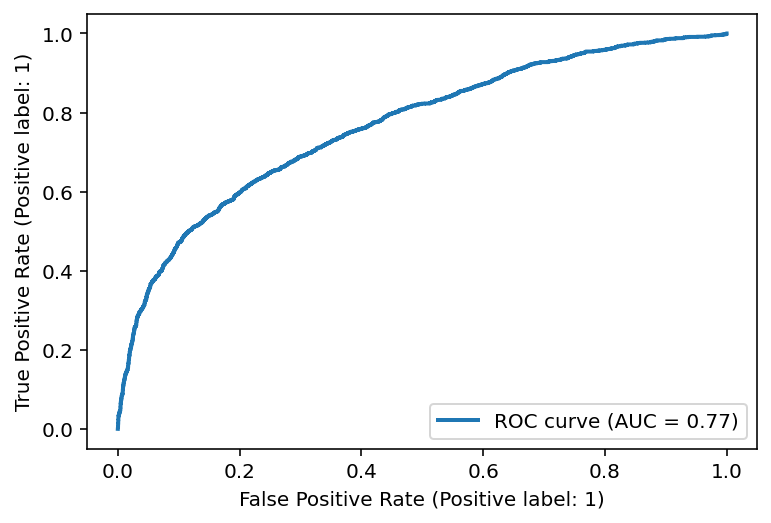

In [ ]:
plot_roc_curve(brain, Xtest_scaled, ytest,name='ROC curve', lw=2)
plt.show()

### We need to fit the brain (train our artificial intelligence)

In [ ]:
brain.fit(Xtrain_scaled,ytrain)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000, solver='sgd')

In [ ]:
acc(ytest,brain.predict(Xtest_scaled))
# is this good or not?

0.7867777777777778

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


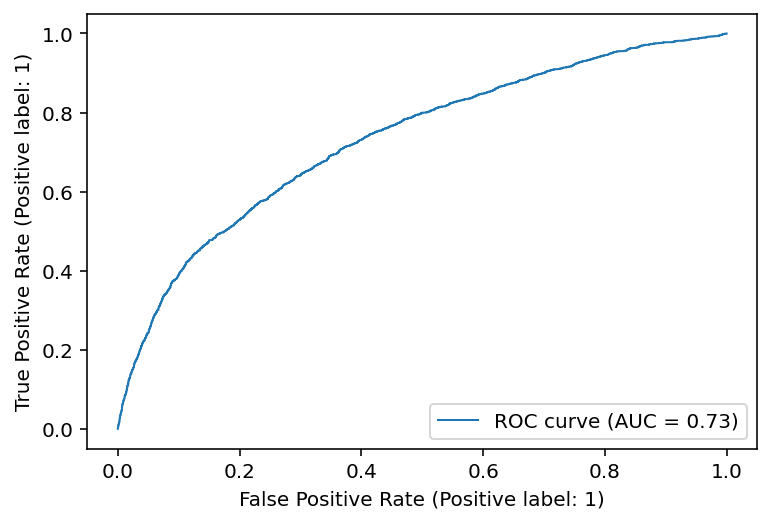

In [ ]:
plot_roc_curve(brain, Xtest_scaled, ytest,name='ROC curve', lw=1)

In [ ]:
brain_mod = MLPClassifier(hidden_layer_sizes=(4,4,4),solver='lbfgs',activation='relu',max_iter=500)

In [ ]:
brain_mod.fit(Xtrain_scaled,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
acc(ytest,brain_mod.predict(Xtest_scaled))

0.7841111111111111

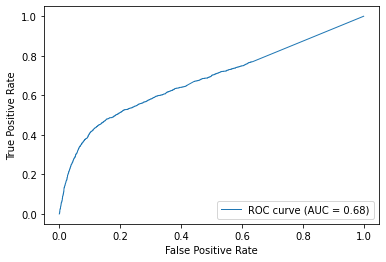

In [ ]:
plot_roc_curve(brain_mod, Xtest_scaled, ytest,name='ROC curve', lw=1)

In [ ]:
brain_mod = MLPClassifier(hidden_layer_sizes=(8,8),solver='lbfgs',activation='relu',max_iter=2000)
brain_mod.fit(Xtrain_scaled,ytrain)
acc(ytest,brain_mod.predict(Xtest_scaled))

0.8174444444444444

##Application with the MNIST Data

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.datasets import load_digits # this is the sklearn version of MNIST
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dig = load_digits() # sklearn specific syntax to import data
X = dig.data
y = dig.target
img = dig.images

Xtrain,Xtest,ytrain,ytest,itrain,itest = tts(X,y,img,test_size=0.4,random_state=123)
ss = StandardScaler()
Xtrain_s = ss.fit_transform(Xtrain)
Xtest_s = ss.fit_transform(Xtest)

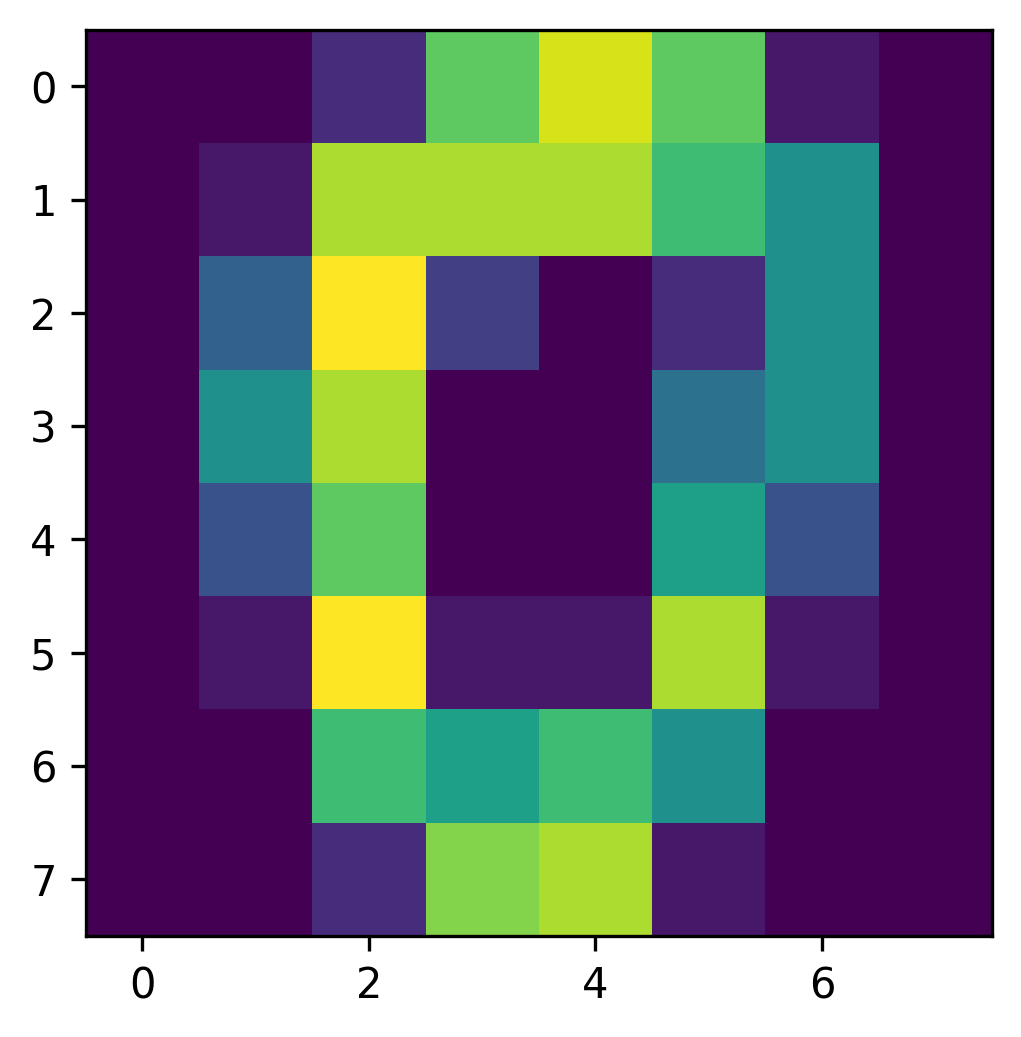

In [ ]:
plt.imshow(img[286])
plt.show()

In [ ]:
img[146].shape

(8, 8)

In [ ]:
#layers = (40,40,40,40) # wow, exact same accuracy as logistic regression
#layers = (50,50) #- 0.9707927677329624
layers = (10,10)
mlp = MLP(hidden_layer_sizes = layers,random_state=123,solver='adam',activation='relu',max_iter=2000)

In [ ]:
from sklearn.metrics import accuracy_score as AC
#kf = KFold(n_splits =10,shuffle=True, random_state=146)

In [ ]:
A = []
for idxtrain, idxtest in skf.split(X,y):
  Xtrain = X[idxtrain]
  Xtest = X[idxtest]
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  mlp.fit(Xtrain,ytrain)
  yhat = mlp.predict(Xtest)
  A.append(AC(ytest,yhat))
np.mean(A)

0.931536312849162

In [ ]:
mlp.fit(Xtrain,ytrain)
y_pred = mlp.predict(Xtest)

In [ ]:
[mlp.score(Xtrain,ytrain), mlp.score(Xtest,ytest)]

[1.0, 0.9707927677329624]

In [ ]:
from sklearn.linear_model import LogisticRegression as LR


In [ ]:
model = LR(solver='lbfgs', maxiter=1000)
model.fit(Xtrain,ytrain)
yhat = model.predict(Xtest)

In [ ]:
[AC(ytrain,model.predict(Xtrain)), AC(ytest, model.predict(Xtest))]

[1.0, 0.9513212795549374]

In [ ]:
n_range = np.arange(10,100,10)
n_layers = 2
train = []
test = []
for n in n_range:
    layers = [n]*n_layers
    mlp = MLP(hidden_layer_sizes = layers,random_state=146,max_iter=1000)
    mlp.fit(Xtrain,ytrain)
    y_pred = mlp.predict(Xtest)
    train.append(mlp.score(Xtrain,ytrain))
    test.append(mlp.score(Xtest,ytest))

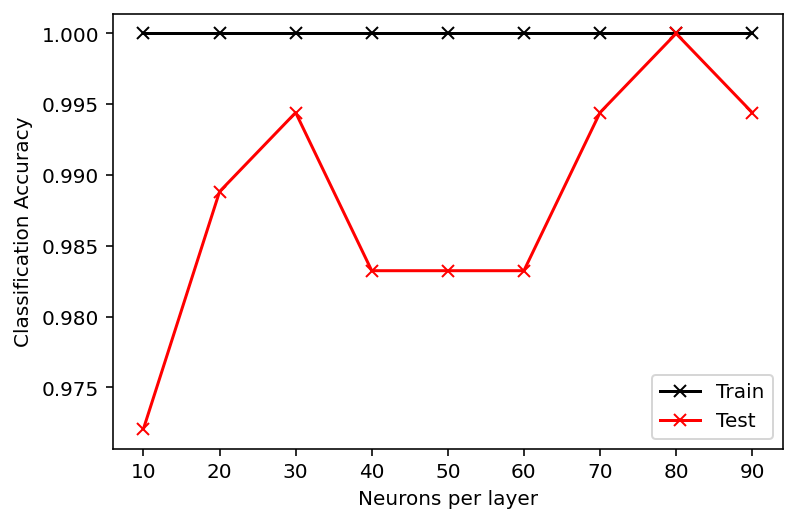

In [ ]:
# this is NOT using a complete k_Fold cross-validation
plt.plot(n_range,train,'-xk', label='Train')
plt.plot(n_range,test,'-xr', label='Test')
plt.xlabel('Neurons per layer')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()

In [ ]:
mlp = MLP(hidden_layer_sizes=(50,50),random_state=146)
mlp.fit(Xtrain,ytrain)
y_pred = mlp.predict(Xtest)

In [ ]:
def CompareClasses(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''

    import pandas as pd
    accuracy = sum(actual==predicted)/actual.shape[0]
    classes = pd.DataFrame(columns=['Actual','Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted
    conf_mat = pd.crosstab(classes['Predicted'],classes['Actual'])
    # Relabel the rows/columns if names was provided
    if type(names) != type(None):
        conf_mat.index=y_names
        conf_mat.index.name='Predicted'
        conf_mat.columns=y_names
        conf_mat.columns.name = 'Actual'
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

In [ ]:
CompareClasses(ytest,y_pred)

Accuracy = 0.99


(Actual      0   1   2   3   4   5   6   7   8   9
 Predicted                                        
 0          18   0   0   0   0   0   0   0   0   0
 1           0  19   0   0   0   0   0   0   0   0
 2           0   0  17   0   0   0   0   0   0   0
 3           0   0   0  19   0   0   0   0   0   0
 4           0   0   0   0  23   0   0   0   0   0
 5           0   0   0   0   0  18   0   0   0   0
 6           0   0   0   0   0   0  17   0   0   0
 7           0   0   0   0   0   0   0  17   0   0
 8           0   0   0   0   0   0   0   0  11   1
 9           0   0   0   0   0   0   0   0   0  19, 0.994413407821229)

##<font color='blue' size=8pt>Neural Networks with Keras and TensorFlow (GPU) for</font> <font color='red' size=8pt> Regression</font>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler # very important

In [59]:
# this is what we need (bare minimum) to build our Neural Network
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam # they are flavors of gradient descent
from keras.layers import LeakyReLU
#from tensorflow.keras.layers.experimental import preprocessing

In [60]:
df = pd.read_csv('drive/MyDrive/Data Sets/mtcars.csv')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [61]:
x = df.loc[:,'wt'].values
y = df.loc[:,'mpg'].values

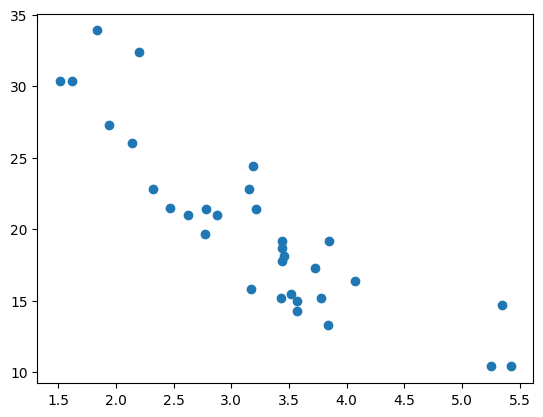

In [ ]:
plt.scatter(x,y)
plt.show()

Let's make a nicer scatter plot.

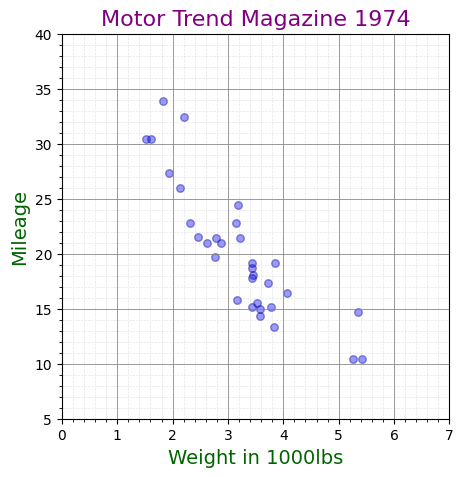

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(0, 7)
ax.set_ylim(5, 40)
#ax.set_aspect('equal')
ax.scatter(x, y,s=30,ec='navy',c='blue',alpha=0.4)
ax.set_xlabel('Weight in 1000lbs',fontsize=14,color='darkgreen')
ax.set_ylabel('Mileage',fontsize=14,color='darkgreen')
ax.set_title('Motor Trend Magazine 1974',fontsize=16,color='purple')
ax.grid(which='major', color ='grey', linestyle='-', lw=0.7,alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--',lw=0.5, alpha=0.2)
ax.minorticks_on()

### Here is the simplest Neural Network we can imagine:

In [92]:
model = Sequential()# this is how we begin the deisgn of the neural network
model.add(Dense(1, activation = 'linear',use_bias=True,input_dim=1))# here we programmed one single neuron and provided one input feature
#model.add(Activation('linear'))
#model.add(Dense(1, activation='linear',use_bias=True))

Here we apply "backpropagation" and, as such, we update the weights.

In [93]:
opt = SGD(learning_rate=0.01) # make sure we choose an optimizer for the updating the weights via backpropagation
model.compile(loss='mean_squared_error',optimizer=opt)# we created a neural network but we have to train it

### Here is where we backprogate and fit the Neural Network

In [94]:
model.fit(x,y,epochs=1500,verbose=0,batch_size=4)

$$Loss(w_1,w_2,...w_p)$$

In [96]:
# here we display the weights that the network learned in the first layer
model.layers[0].get_weights()

[array([[-5.345356]], dtype=float32), array([37.190983], dtype=float32)]

In [95]:
mse(y,model.predict(x))

1/1 [==============================] - 0s 34ms/step


8.70696820598944

In [68]:
reg = LinearRegression()

In [69]:
reg.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

In [70]:
reg.coef_

array([[-5.34447157]])

In [71]:
reg.intercept_

array([37.28512617])

In [ ]:
mse(y,reg.predict(x.reshape(-1,1)))

8.697560548229477

In [ ]:
# let's try to compare with a plain linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
print('the slope is : ',str(lr.coef_),'  and the intercept is :',str(lr.intercept_))

the slope is :  [-5.34447157]   and the intercept is : 37.28512616734204


In [97]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
yhat = model.predict(x)

1/1 [==============================] - 0s 24ms/step


In [29]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 1), 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-5.323161]], dtype=float32), array([37.220753], dtype=float32)]
{'name': 'activation_2', 'trainable': True, 'dtype': 'float32', 'activation': 'linear'} []


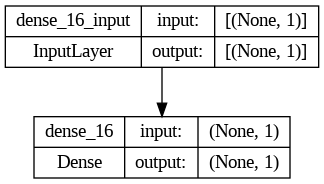

In [99]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.layers[1].get_weights()

[]

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse(y,yhat)

8.76976507346799

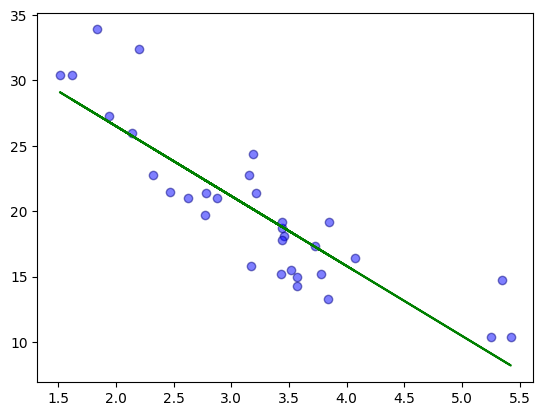

In [100]:
plt.scatter(x, y, ec='navy',c='blue',alpha=0.5)
plt.plot(x, yhat, color='g')
plt.show()

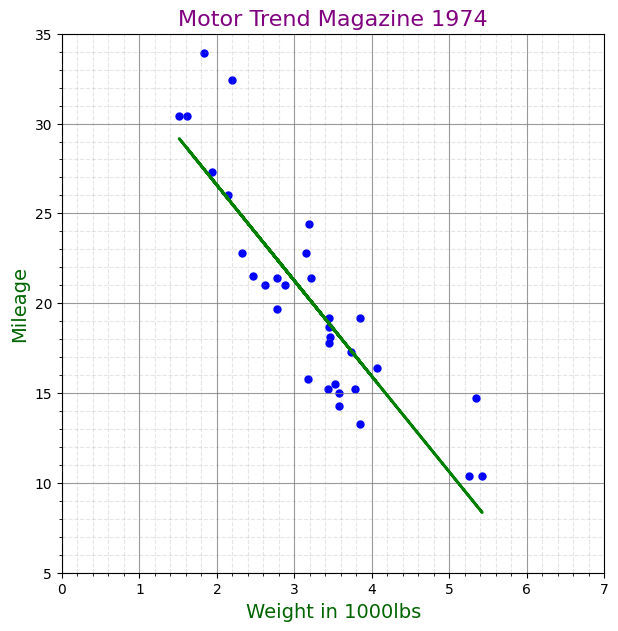

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(0, 7)
ax.set_ylim(5, 35)
ax.scatter(x, y,s=25,c='blue')
ax.plot(x, yhat, color='g',lw=2)
ax.set_xlabel('Weight in 1000lbs',fontsize=14,color='darkgreen')
ax.set_ylabel('Mileage',fontsize=14,color='darkgreen')
ax.set_title('Motor Trend Magazine 1974',fontsize=16,color='purple')
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-5.2838926]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([37.186954], dtype=float32)>]

###<font color='blue' size=6pt> Example 2 (with 4 neurons) -> Machine Learns Nonlinear Relationships

In [124]:
model = Sequential()
model.add(Dense(3, activation='gelu',use_bias=True,input_dim=1))
model.add(Dense(1,activation='linear'))# the output layer

The first layer has 3 neurons, and the input has one feature. So, we have 3 synapses from the input to the first layer, plus a bias term.

The model would be a1(w1*x+b1) + a2(w2*x+b2) +a3(w3*x+b3)

In [125]:
opt = Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error',optimizer=opt)

In [126]:
model.fit(x,y,epochs=2500,verbose=0, batch_size=4)

In [105]:
model.weights

[<tf.Variable 'dense_17/kernel:0' shape=(1, 3) dtype=float32, numpy=array([[-0.04931736, -0.4192891 , -4.177449  ]], dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.      ,  0.      , 17.679941], dtype=float32)>,
 <tf.Variable 'dense_18/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[-1.0537696],
        [ 0.2917508],
        [ 1.640883 ]], dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(1,) dtype=float32, numpy=array([12.484772], dtype=float32)>]

In [127]:
pred = model.predict(x)

1/1 [==============================] - 0s 68ms/step


In [128]:
mse(y,pred)

6.967097873720402

In [55]:
model.predict([2.34])

1/1 [==============================] - 0s 81ms/step


array([[25.433674]], dtype=float32)

In [129]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
pred = model.predict(X_grid)

13/13 [==============================] - 0s 2ms/step


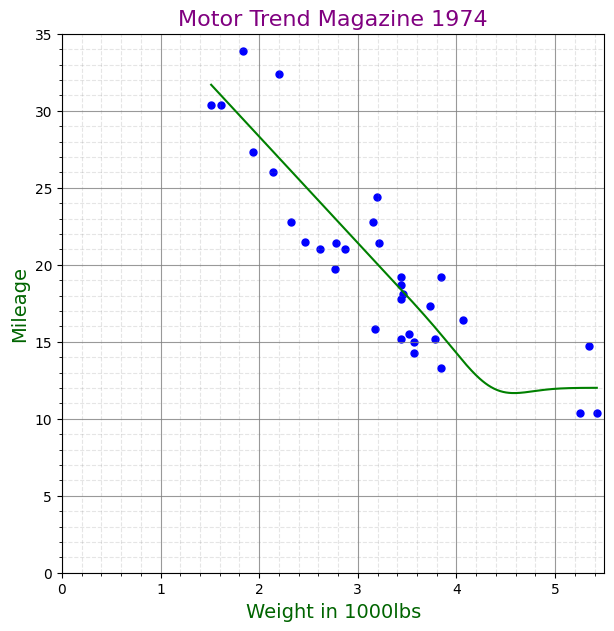

In [130]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(0, 5.5)
ax.set_ylim(0, 35)
ax.scatter(x, y,s=25,c='blue')
ax.plot(X_grid, pred, color='g',lw=1.5)
ax.set_xlabel('Weight in 1000lbs',fontsize=14,color='darkgreen')
ax.set_ylabel('Mileage',fontsize=14,color='darkgreen')
ax.set_title('Motor Trend Magazine 1974',fontsize=16,color='purple')
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

### A Different Design

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
opt = Adam(learning_rate=0.1)
model.compile(loss='mse',optimizer=opt)

In [ ]:
model.fit(x,y,epochs=2000,verbose=0)

In [ ]:
mse(y,model.predict(x))

5.4526561596581775

In [ ]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

In [ ]:
pred = model.predict(np.sort(X_grid))

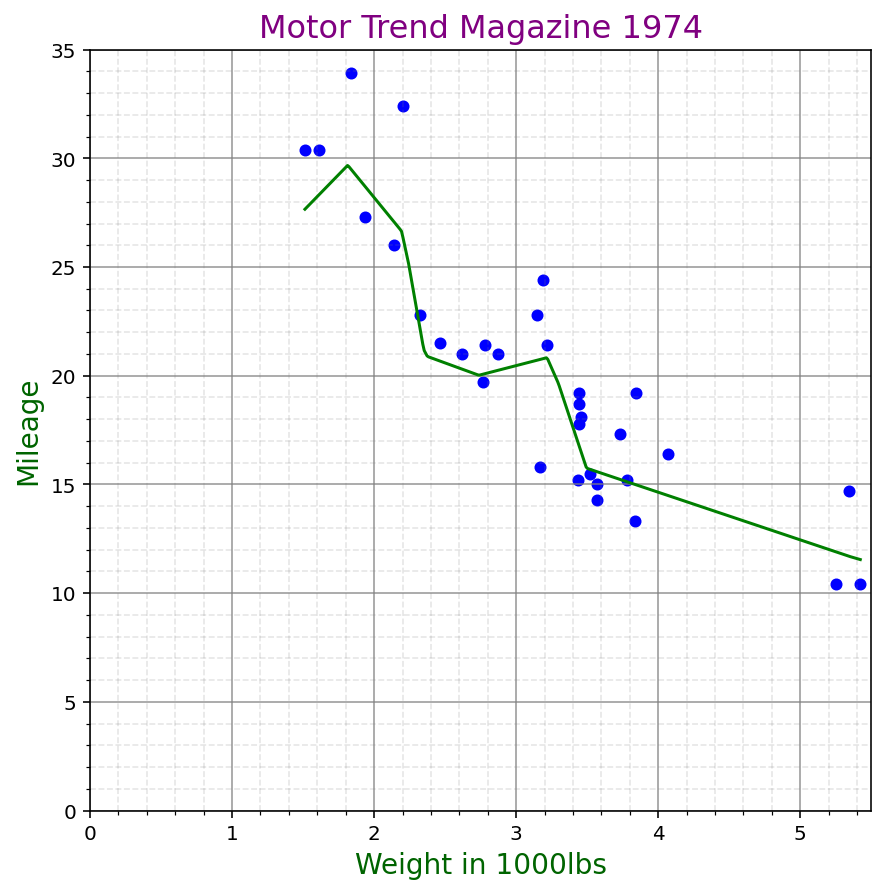

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(0, 5.5)
ax.set_ylim(0, 35)
ax.scatter(x, y,s=25,c='blue')
ax.plot(X_grid, pred, color='g',lw=1.5)
ax.set_xlabel('Weight in 1000lbs',fontsize=14,color='darkgreen')
ax.set_ylabel('Mileage',fontsize=14,color='darkgreen')
ax.set_title('Motor Trend Magazine 1974',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

------------